# Backtest 시뮬레이션

```
pip install backtrader backtesting bt
```
- [TA-lib과의 호환성 좋은 패키지](https://kernc.github.io/backtesting.py/)
- [구글에서 파이썬관련 백테스트로 가장 많이 검색되는 메뉴얼이 잘 구성된 패키지](https://www.backtrader.com)`
- [포트폴리오전략과 트레이딩 전략을 동시에 다룰 수 있는 bt 패키지](https://pmorissette.github.io/bt/)

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# 티커 리스트 정의
tickers = ['SPY','IEV','EWJ','EEM','TLT','IEF','IYR','RWX','GLD','DBC']

# 시작일과 종료일 설정
start_date = "2006-01-01"
end_date = "2024-06-30"

# 데이터 다운로드
price=yf.download(tickers, start=start_date, end=end_date)
# 종가(Adj Close) 데이터만 선택
price = price['Adj Close']

# 데이터 확인
display(price.tail())

[*********************100%%**********************]  10 of 10 completed


Ticker,DBC,EEM,EWJ,GLD,IEF,IEV,IYR,RWX,SPY,TLT
Date,,,,,,,,,,
2024-06-24,23.389999,42.669998,66.510002,215.630005,94.142624,55.470001,87.650002,24.209999,542.739990,94.040878
2024-06-25,23.170000,42.570000,67.559998,214.559998,94.222389,55.430000,86.589996,24.190001,544.830017,94.200378
2024-06-26,23.209999,42.480000,67.309998,212.580002,93.654121,54.939999,86.339996,23.940001,545.510010,92.854660
2024-06-27,23.330000,42.509998,67.650002,214.990005,93.863480,54.849998,87.070000,23.950001,546.369995,93.223480
2024-06-28,23.230000,42.590000,68.239998,215.009995,93.365005,54.759998,87.739998,24.000000,544.219971,91.488998


## 1. bt패키지

### 1.2 전략 정의

In [2]:
import bt
'''
전체 자산의 동일비중, 매월말 리벨런싱을 해보자
'''
strategy = bt.Strategy("Asset_EW",[ #전략의 이름
    bt.algos.SelectAll(), # 모든 데이터 사용함
    bt.algos.WeighEqually(), # 동일비중으로 투자
    bt.algos.RunMonthly(), # 매월말 리밸런싱
    bt.algos.Rebalance() # 계산된 비중에 따라 리벨런싱
])

d:\miniconda\envs\ml4t\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[algos모듈로 다양한 백테스트 정의를 할 수 있다](https://pmorissette.github.io/bt/bt.html#module-bt.algos)

### 1.3 전략 백테스트

100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


<Axes: >

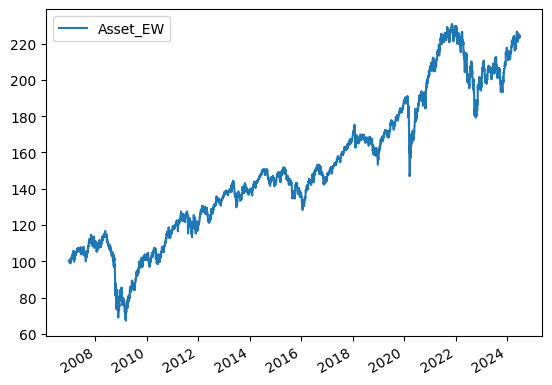

In [3]:
data = price.dropna()
backtest = bt.Backtest(strategy, data)
result = bt.run(backtest)
result.prices.plot()

In [4]:
'''
종목별 투자비중확인
'''
result.get_security_weights().head()

,DBC,EEM,EWJ,GLD,IEF,IEV,IYR,RWX,SPY,TLT
2006-12-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-12-19,0.099978,0.099995,0.099966,0.099992,0.099994,0.099974,0.099969,0.099975,0.099986,0.099999
2006-12-20,0.099972,0.100891,0.100469,0.099494,0.099761,0.099186,0.100590,0.099965,0.099722,0.099780
2006-12-21,0.099094,0.100842,0.101175,0.099236,0.100252,0.099367,0.099754,0.100211,0.099487,0.100412
2006-12-22,0.099899,0.101243,0.101574,0.099711,0.099835,0.098765,0.099017,0.101189,0.098914,0.099682


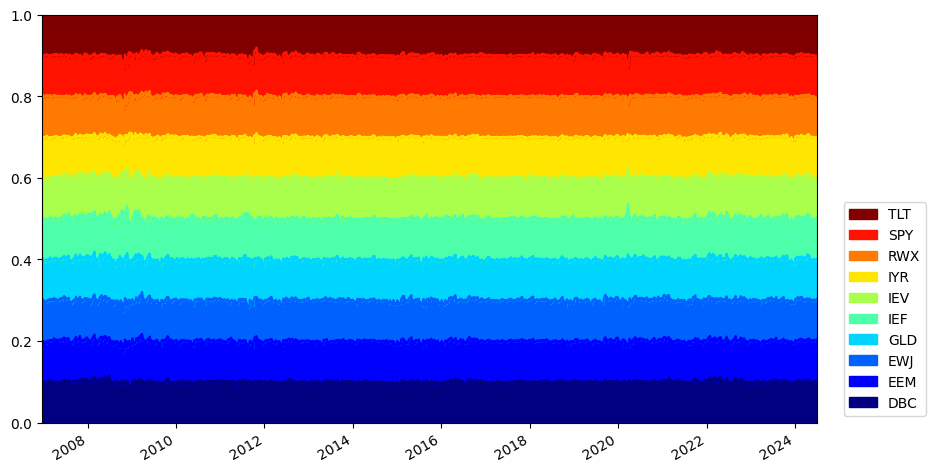

In [6]:
'''
투자비중을 히트맵으로 그리자
'''
def security_weights(result):
    # matplotlib의 컬러맵 모듈 임포트
    from matplotlib import cm
    import matplotlib.pyplot as plt

    # 결과의 증권 가중치를 area plot으로 그리고, 그래프 객체 ax에 저장
    ax = result.get_security_weights().plot.area(figsize = (10,6),  # 그래프 크기 설정
                                                ylim=[0,1],         # y축 범위 설정
                                                legend=False,       # 범례 비활성화
                                                colormap=cm.jet)    # 컬러맵 설정

    # 범례 핸들과 레이블 가져오기
    handles, labels = ax.get_legend_handles_labels()

    # 그래프 여백 제거
    plt.margins(0,0)

    # 범례 설정 및 배치
    plt.legend(reversed(handles),           # 범례 핸들 역순 정렬
               reversed(labels),            # 범례 레이블 역순 정렬
               loc = 'lower right',         # 범례 위치
               bbox_to_anchor = (1.15, 0))  # 범례의 상대적 위치 조정

    # 그래프 표시
    plt.show()
    
security_weights(result)

> 매월 말 리벨런싱을 하므로 대부분의 구간에서 모든자산에 10%씩 균등하게 투자 된다./ 

In [6]:
'''
각종 성과지표를 보자
'''

result.display()

Stat                 Asset_EW
-------------------  ----------
Start                2006-12-18
End                  2024-06-28
Risk-free rate       0.00%

Total Return         123.77%
Daily Sharpe         0.41
Daily Sortino        0.64
CAGR                 4.70%
Max Drawdown         -42.35%
Calmar Ratio         0.11

MTD                  0.38%
3m                   0.08%
6m                   2.88%
YTD                  3.16%
1Y                   9.09%
3Y (ann.)            0.25%
5Y (ann.)            4.96%
10Y (ann.)           4.07%
Since Incep. (ann.)  4.70%

Daily Sharpe         0.41
Daily Sortino        0.64
Daily Mean (ann.)    5.51%
Daily Vol (ann.)     13.48%
Daily Skew           -0.21
Daily Kurt           10.31
Best Day             7.81%
Worst Day            -6.77%

Monthly Sharpe       0.44
Monthly Sortino      0.70
Monthly Mean (ann.)  5.29%
Monthly Vol (ann.)   12.07%
Monthly Skew         -0.83
Monthly Kurt         3.63
Best Month           8.67%
Worst Month          -17.98%

Year

## 2. 정적 자산배분 : 올웨더포트폴리오

- 자산 배분 전략
자산 배분은 포트폴리오 내에 다양한 자산에 분산 투자하여 위험을 줄이고 일정 수준의 수익을 달성하고자 하는 방법입니다. 자산 배분은 크게 두 가지로 나뉩니다
    - 정적 자산배분: 주식과 채권 등 자산에 대한 비중을 어떠한 시장 상황에서도 6:4 또는 8:2로 배분하고 유지하는 전략입니다.
    - 동적 자산배분: 시장 상황에 따라 자산 비중을 조정하는 전략입니다.

- 올웨더 포트폴리오 (All-weather Portfolio)

레이 달리오(Ray Dalio)가 운용하는 기법으로 유명해진 올웨더 포트폴리오가 있습니다.<br>
레이 달리오는 세계 최대 헤지펀드인 브리지워터 어소시에이츠(Bridgewater Associates)의 설립자입니다.<br>
그는 시시각각 변하는 경제 상황 속에서 어떠한 경제환경이 와도 견딜 수 있는 포트폴리오를 구상하였으며, 이것이 올웨더 포트폴리오입니다.<br>
경제 환경은 크게 경제 성장률과 물가 상승률로 나눌 수 있으며, 각 국면마다 우수한 성과를 보이는 자산은 다릅니다.<br><br>

- 경제 환경의 구분
|경제성장|물가|
|-|-|
|1. 상승<br>(주식, 원자재)<br>시장기대|3. 물가연동 채권,<br>원자재, 신흥국 채권|
|2. 하락<br>(채권,<br>물가연동 채권)|4. 주식, 채권|


경제 성장률이 높은 구간에서는 위험 자산의 성과가 우수하다.
경제 성장률이 낮은 구간에서는 채권의 성과가 우수하다.
물가 상승률이 높은 구간에서는 원자재나 신흥국 채권의 성과가 우수하다.
물가 상승률이 낮은 구간에서는 주식과 채권의 성과가 우수하다.

올웨더 포트폴리오는 네 가지 상황 중 하나를 예측하기보다는, 각각의 상황에 맞는 자산을 모두 포트폴리오에 담아 미리 대비합니다. 또한, 각 상황이 올 확률이 25%씩 같다고 가정할 경우, 자산별 투자비중은 다음과 같습니다:

주식: 30%
장기채: 40%
중기채: 15%
금: 7.5%
원자재: 7.5%

이러한 자산 배분 전략은 다양한 경제 상황에서 안정적인 수익을 추구하는 것을 목표로 합니다.

100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


<Axes: title={'center': 'Equity Progression'}>

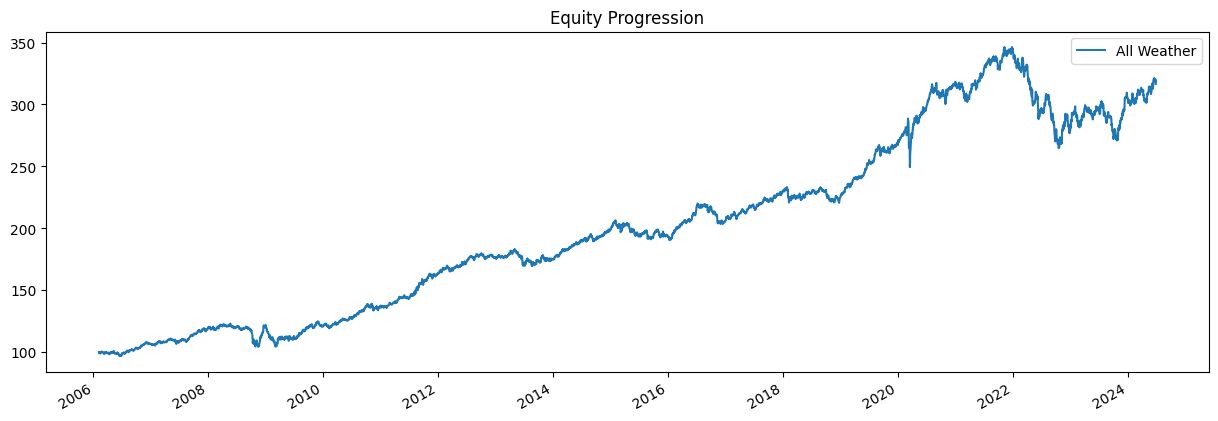

In [4]:
import bt
import matplotlib.pyplot as plt
%matplotlib inline

data = price[['SPY','TLT','IEF','GLD','DBC']].dropna()
aw = bt.Strategy('All Weather',[
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(SPY=0.3,TLT=0.4,IEF=0.15,GLD=0.075,DBC=0.075),
    bt.algos.RunQuarterly(),
    bt.algos.Rebalance()
])
aw_backtest = bt.Backtest(aw, data)
aw_result = bt.run(aw_backtest)
aw_result.plot()

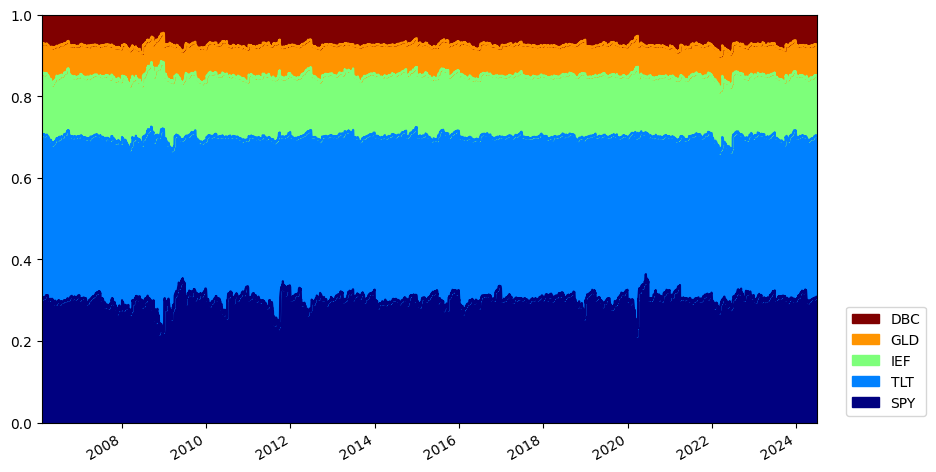

In [7]:
security_weights(aw_result)

> 분기별로 리벨런싱이 이뤄짐에 따라 각 자산별 투자비중이 일정하게 유지된다. 

In [8]:
'''
최근성과를 비교해보자
'''
pd.concat([aw_result.lookback_returns,result.lookback_returns],axis=1)

,All Weather,Asset_EW
mtd,0.019437,0.003773
3m,0.009416,0.000801
6m,0.027347,0.028822
ytd,0.032964,0.031602
1y,0.065605,0.090895
3y,-0.008844,0.002467
5y,0.046319,0.049648
10y,0.052029,0.040741
incep,0.064655,0.047024


In [9]:
cs = ['total_return','cagr','daily_vol','max_drawdown','calmar','daily_sharpe'] 
pd.concat([aw_result.stats.loc[cs],result.stats.loc[cs]],axis=1)

,All Weather,Asset_EW
total_return,2.165543,1.237673
cagr,0.064655,0.047024
daily_vol,0.081164,0.134814
max_drawdown,-0.236024,-0.423528
calmar,0.273933,0.11103
daily_sharpe,0.813426,0.408916


- total_return (총 수익률):

All Weather: 2.165543 (약 116.55% 수익)
Asset_EW: 1.23767 (약 23.77% 수익)
All Weather 전략이 더 높은 총 수익률을 보여줍니다.


- cagr (연평균 성장률):

All Weather: 0.064655 (약 6.47% 연평균 성장)
Asset_EW: 0.047024 (약 4.70% 연평균 성장)
All Weather 전략이 더 높은 연평균 성장률을 보입니다.


- daily_vol (일일 변동성):

All Weather: 0.081164 (약 8.12%)
Asset_EW: 0.134814 (약 13.48%)
All Weather 전략이 더 낮은 일일 변동성을 보여 상대적으로 안정적입니다.


- max_drawdown (최대 손실폭):

All Weather: -0.236024 (약 23.60% 최대 손실)
Asset_EW: -0.423528 (약 42.35% 최대 손실)
All Weather 전략이 더 작은 최대 손실폭을 보여 위험이 더 낮습니다.


- calmar (칼마 비율):

All Weather: 0.273933
Asset_EW: 0.11103
All Weather 전략이 더 높은 칼마 비율을 보여, 위험 대비 수익이 더 좋습니다.


- daily_sharpe (일일 샤프 비율):

All Weather: 0.813426
Asset_EW: 0.408915
All Weather 전략이 더 높은 일일 샤프 비율을 보여, 위험 조정 수익률이 더 높습니다.



> 종합적으로, "All Weather" 전략이 "Asset_EW" 전략보다 더 높은 수익률, 더 낮은 변동성, 더 작은 최대 손실폭, 그리고 더 나은 위험 조정 수익률을 보여주고 있어 전반적으로 더 우수한 성과를 나타내고 있습니다.

## 3.동적자산배분

- **정적 자산배분**: 자산별 일정 비중을 유지하는 전략
- **동적 자산배분**: 시장 상황에 따라 투자하는 대상과 비중을 계속해서 변경하는 전략
  - 상대적으로 우리한 자산은 좋은 성과를 보일 것이며, 경제 국면은 장기간 지속되는 추세가 있으므로 모멘텀이 있는 자산에 투자하는 것이 현명한 방법일 수 있다.

-  모멘텀을 이용한 동적 자산배분 포트폴리오 예시

1. 글로벌 10개 자산 중 과거 12개월 수익률이 높은 5개 자산을 선택한다.
2. 위험균형 포트폴리오를 구성한다.
3. 매 월말 리밸런싱을 실시한다.

- 선택 이유: 10개 자산에서 과거 수익률 기준 5개 자산만 선택하는 이유는 모멘텀 효과를 얻기 위해서다.

[그림16-3]
- 그림 16.3은 글로벌 10개 자산의 과거 6개월 수익률을 기준으로 순위를 매기고, 각 순위별로 다음 월의 수익률이 상위 50%가 될 확률을 구한 값이다.
- 수익률이 높은 1~5위까지의 자산은 다음 월에도 수익률이 높을 확률이 50%가 넘지만, 수익률이 낮은 6~10위까지의 자산은 다음 월에 수익률이 높을 확률이 50%가 되지 않는다.
- 따라서 자산군 간에도 모멘텀 효과가 존재하며, 이를 활용하기 위해 모멘텀 상위 자산만을 선택해 투자한다.
- 위험균형 포트폴리오를 이용해 변동성이 지나치게 큰 자산에 의해 포트폴리오의 수익률이 크게 영향받는 일을 줄이고, 최대한 안정적인 포트폴리오를 구성한다.
- 동적 자산배분의 로직이 다소 복잡해 보이지만, bt 패키지에 내장된 함수를 이용할 경우 역시나 매우 손쉽게 백테스트할 수 있다.

이 전략은 시장의 변화에 따라 자산 배분을 조정하면서도 모멘텀 효과를 활용하여 수익을 추구하는 방법을 보여줍니다.

100%|██████████| 1/1 [00:18<00:00, 18.57s/it]


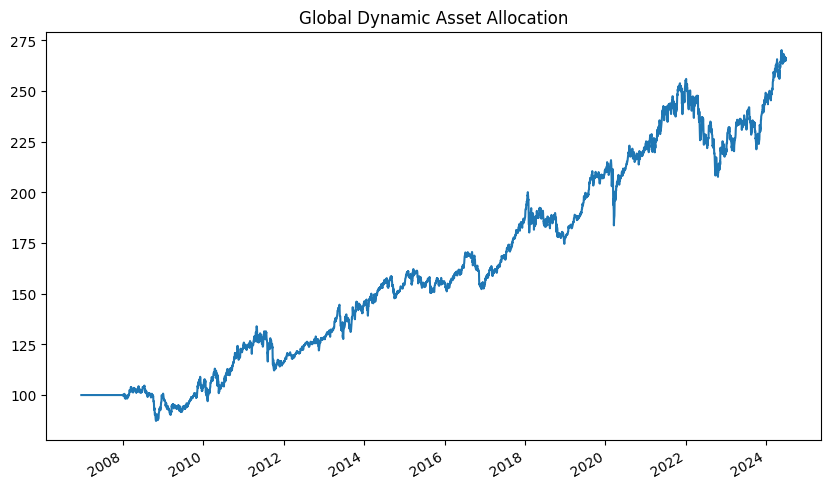

In [10]:
import bt
import matplotlib.pyplot as plt

data = price.dropna()

gdaa = bt.Strategy('GDAA', [
    bt.algos.SelectAll(),
    bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(years=1)),
    bt.algos.WeighERC(lookback=pd.DateOffset(years=1)),
    bt.algos.RunMonthly(),    
    bt.algos.Rebalance()
])

gdaa_backtest = bt.Backtest(gdaa, data)
gdaa_result = bt.run(gdaa_backtest)

gdaa_result.plot(figsize=(10, 6),
                 title='Global Dynamic Asset Allocation',
                 legend=False)
plt.show()

1. `bt.Strategy()` 내에 전략을 정의해준다.
    - `bt.algos.SelectAll()`: 전체 데이터를 선택한다.
    - `bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(years=1))`: 모멘텀 상위 종목을 선택하며 갯수는 5개, 모멘텀 관측 기간은 과거 1년으로 한다.
    - `bt.algos.WeighERC(lookback = pd.DateOffset(years=1))`: ERC 즉 위험균형 포트폴리오를 구성하며, 분산-공분산 계산을 위한 수익률은 과거 1년 데이터를 이용한다.
    - `bt.algos.RunMonthly()`: 매월 리밸런싱을 실시한다.    
    - `bt.algos.Rebalance()`: 리밸런싱을 정의한다.
2. 백테스트를 생성 및 실행한다.

이처럼 algos 모듈 내의 각종 함수를 이용하면 다양한 전략을 손쉽게 정의 및 백테스트 할 수 있다.

```{note}
그래프를 살펴보면 처음 1년간은 수익률에 변화가 없으며, 이는 모멘텀 관측을 위한 1년 간은 투자를 할 수 없기 때문이다. 성과를 평가할 때는 이처럼 투자가 이루어지지 않는 기간을 제외하고 실제 투자가 이루어진 부분부터 평가해야 한다.
```

### 거래 비용 고려하기

정적 자산배분과는 달리 동적 자산배분은 매 시점마다 투자하는 대상 및 투자비중이 변한다. 비중을 확인해보도록 하자.

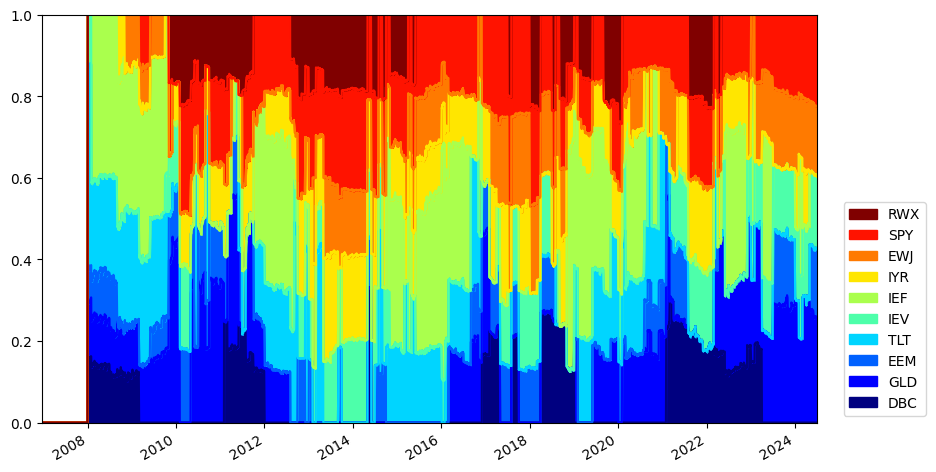

In [11]:
security_weights(gdaa_result)

In [20]:
pd.concat([aw_result.stats.loc[cs],result.stats.loc[cs],gdaa_result.stats.loc[cs]],axis=1)

,All Weather,Asset_EW,GDAA,GDAA_net
total_return,2.165543,1.237673,1.661615,1.341652
cagr,0.064655,0.047024,0.05744,0.049741
daily_vol,0.081164,0.134814,0.104333,0.104348
max_drawdown,-0.236024,-0.423528,-0.188753,-0.193397
calmar,0.273933,0.11103,0.304311,0.257196
daily_sharpe,0.813426,0.408916,0.588481,0.51826


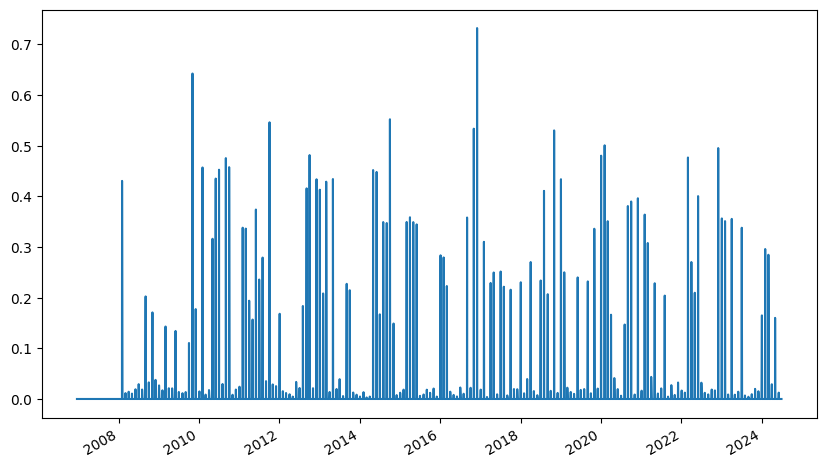

In [12]:
gdaa_backtest.turnover.plot(figsize=(10, 6), legend=False)
plt.show()

생성된 백테스트에서 `turnover` 메서드를 통해 턴오버를 구할 수 있다. 매월 상당한 턴오버가 발생하므로, 이를 고려한 수익률을 추가로 살펴볼 필요가 있다. 매수 혹은 매도당 발생하는 세금, 수수료, 시장충격 등 총 비용을 0.2%로 가정하여 백테스트를 실행한다.

In [13]:
gdaa_backtest_net = bt.Backtest(gdaa,
                                data,
                                name='GDAA_net',
                                commissions=lambda q, p: abs(q) * p * 0.002)
gdaa_result = bt.run(gdaa_backtest, gdaa_backtest_net)

100%|██████████| 2/2 [00:18<00:00,  9.14s/it]


1. `bt.Backtest()` 함수 내에 기존에 정의된 백테스트인 gdaa를 그대로 사용하며, commissions 부분에 수수료를 계산하는 부분을 입력한다. q는 quantity(주수), p는 price(주가)를 의미하며, 즉 총 거래 가격에서 0.2%가 수수료로 나간다고 가정한다.
2. `bt.run()` 내에 기존에 생성된 백테스트 내용(gdaa_backtest)과 새롭게 생성된 백테스트 내용(gdaa_backtest_net)을 동시에 입력하면, 두 개의 백테스트가 한번에 실행된다.

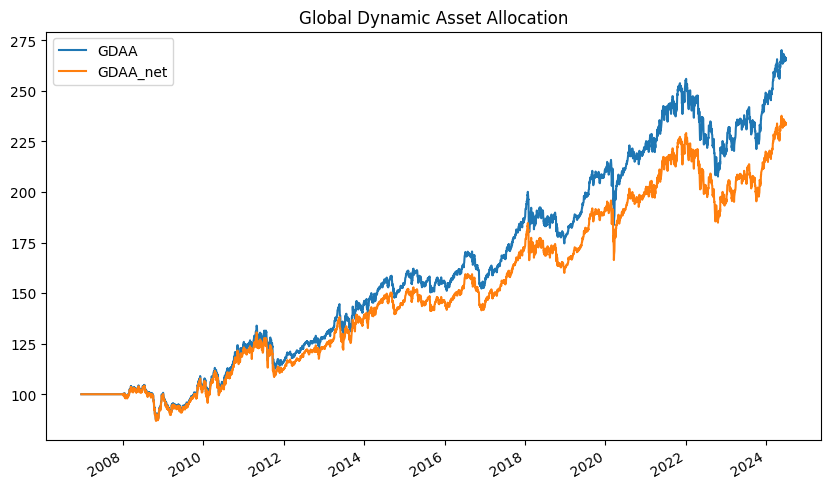

In [14]:
gdaa_result.prices.plot(figsize=(10, 6),
                        title='Global Dynamic Asset Allocation')
plt.show()

기존의 비용을 고려하지 않은 포트폴리오(GDAA)에 비해, 비용을 차감한 포트폴리오(GDAA_net)의 수익률이 시간이 지남에 따라 서서히 감소한다. 모델 포트폴리오와 실제 포트폴리오 수익률 간의 차이는 매매시 비용이 크거나 턴오버가 높을수록 더욱 벌어지므로, 실제 매매에서는 비용과 턴오버를 줄이는 것이 매우 중요하다.

## 4. 추세추종 전략 백테스트

추세추종이란 주가가 동일한 방향으로 지속될 것이라는데 베팅하는 것이다. 추세추종, 혹은 모멘텀 전략은 월스트리트에서 가장 오래된 투자전략 중 하나로써, 무려 1838년에 출간된 책에도 설명될 만큼 역사가 길고, 현재에도 가장 많이 사용되는 전략 중 하나이다.

### 마켓 타이밍 전략

대표적인 추세추종 전략인 이동평균선을 이용한 트레이딩의 백테스트를 진행해보도록 하겠다. 메브 파버(Meb Faber)는 본인의 논문을 통해, 시점 선택(Market Timing) 전략을 사용할 경우 단순히 매수 후 보유하는 것 대비 극심한 하락장에서 낙폭을 줄일 수 있으며, 이로 인해 위험 대비 수익률을 올릴 수 있다고 설명하였다. 논문에서 말하는 시점 선택의 투자 규칙은 다음과 같다.

$$ 주가 > 10개월 이동평균 → 매수$$
$$ 주가 < 10개월 이동평균 → 매도\ 및\ 현금보유$$

즉 주가가 10개월 이동평균 보다 위에 있다는 것은 상승추세를 의미하므로 매수 포지션을, 10개월 이동평균 보다 아래에 있다는 것을 하락추세를 의미하므로 현금 보유를 통해 하락 방어를 하고자 한다. 먼저 해당 규칙을 미국 S&P 500를 추종하는 SPY ETF에 적용하는 예제를 살펴보겠다.

In [15]:
# SMA
import pandas_ta as ta

data = price[['SPY']].dropna()
sma = data.apply(lambda x: ta.sma(x, 200))

In [16]:
import bt

bt_sma = bt.Strategy('Timing', [
    bt.algos.SelectWhere(data > sma),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
])

bt_sma_backtest = bt.Backtest(bt_sma, data)

100%|██████████| 2/2 [00:04<00:00,  2.47s/it]


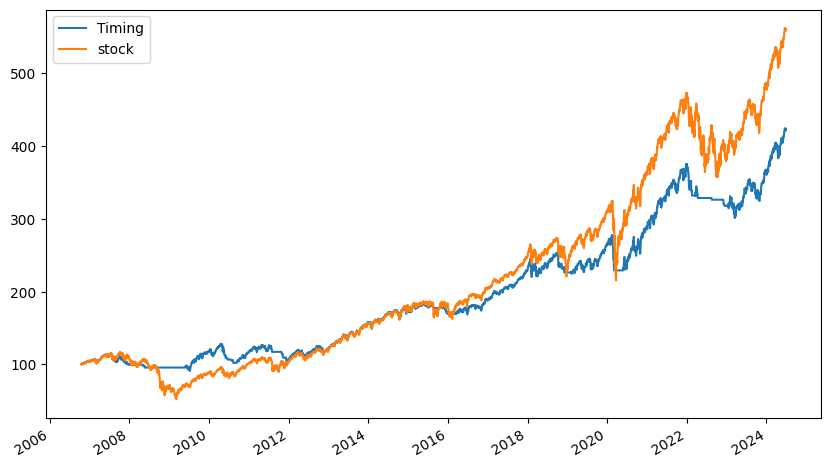

In [17]:
def buy_and_hold(data, name):

    # 벤치마크 전략 생성
    bt_strategy = bt.Strategy(name, [        
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.RunOnce(),
        bt.algos.Rebalance()
    ])
    # Return the backtest
    return bt.Backtest(bt_strategy, data)


# 벤치마크 전략 백테스트
stock = buy_and_hold(data[['SPY']], name='stock')

# 두개 백테스트 동시에 실행
bt_sma_result = bt.run(bt_sma_backtest, stock)
import matplotlib.pyplot as plt

bt_sma_result.prices.iloc[201:, ].rebase().plot(figsize=(10, 6))
plt.show()

In [18]:
'''
최근성과를 비교해보자
'''
pd.concat([bt_sma_result.lookback_returns,result.lookback_returns],axis=1)

,All Weather,Asset_EW
mtd,0.019437,0.003773
3m,0.009416,0.000801
6m,0.027347,0.028822
ytd,0.032964,0.031602
1y,0.065605,0.090895
3y,-0.008844,0.002467
5y,0.046319,0.049648
10y,0.052029,0.040741
incep,0.064655,0.047024


## 5. 평균회귀 전략 백테스트
추세추종 전략은 주가가 동일한 방향으로 지속된다고 보는 반면, 평균회귀 전략은 주가가 평균으로 회귀한다고 보며 이에 베팅한다. 주가가 무한정 한방향으로 지속될 수는 없기에 추세추종 전략과 평균회귀 전략을 잘 조합할 필요가 있다.


### RSI를 이용한 전략
RSI는 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타낸 지표로써, 일반적으로 RSI가 70 이상일 경우 과매수 구간으로써 매도할 때를, 30 이하일 경우 과매도 구간으로써 매수해야 할 때로 여겨진다. 이에 대한 백테스트를 실행해보도록 하자.

In [19]:
import pandas_ta as ta

data = price[['SPY']]
spy_rsi = data.apply(lambda x: ta.rsi(x, 14))

signal = spy_rsi.copy()
signal[spy_rsi > 70] = -1
signal[spy_rsi < 30] = 1
signal[(spy_rsi <= 70) & (spy_rsi >= 30)] = 0
signal[signal.isnull()] = 0

먼저 `apply()` 함수 내부에 `rsi()`을 이용해 14일 기준 RSI를 구한다. 그 후 RSI가 70을 초과하면 -1(숏 포지션), 30 미만이면 1(롱 포지션), 30과 70 사이면 0(뉴트럴)인 신호를 만든다.

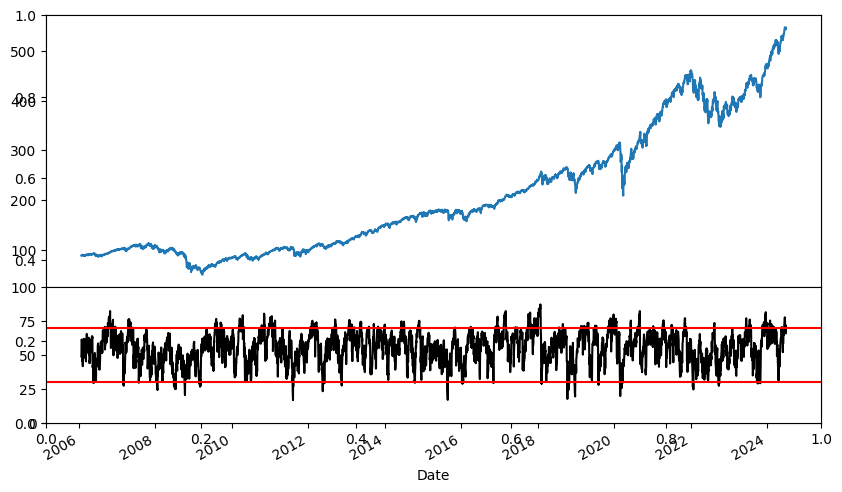

In [20]:
from matplotlib import gridspec

fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax1 = data['SPY'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

ax2 = plt.subplot(gs[1])
ax2 = spy_rsi['SPY'].plot(color='black', ylim=[0, 100])
ax2 = plt.axhline(y=30, color='red', linestyle='-')
ax2 = plt.axhline(y=70, color='red', linestyle='-')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

> 위쪽의 그래프는 주가를 나타내며, 아래쪽의 그래프는 RSI를 나타낸다. 이제 만들어진 신호를 바탕으로 백테스트를 실행해보자.

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


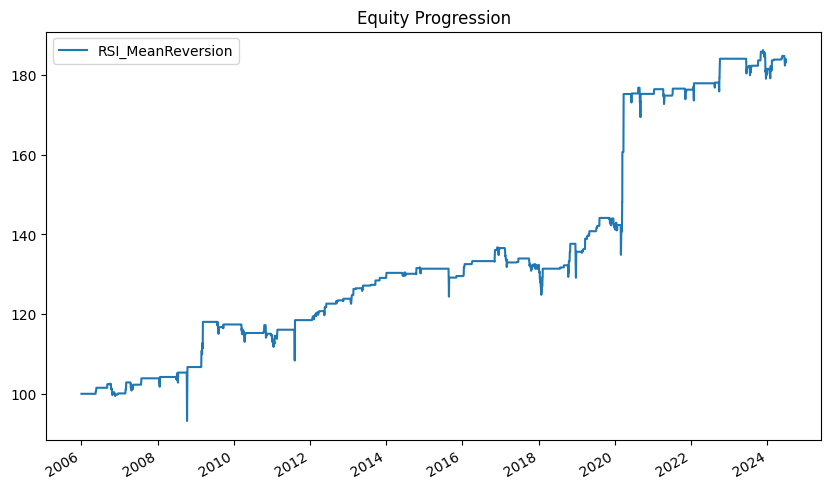

In [21]:
strategy = bt.Strategy('RSI_MeanReversion',
                       [bt.algos.WeighTarget(signal),
                        bt.algos.Rebalance()])
backtest = bt.Backtest(strategy, data)
result = bt.run(backtest)

result.plot(figsize=(10, 6))
plt.show()

### 볼린저 밴드를 이용한 전략

이번에는 볼린저 밴드를 이용한 평균회귀 전략을 백테스트 해보도록 하겠다. 볼린저밴드는 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드다. 주가가 정규분포를 따른다면 주가의 움직임은 상한선과 하한선으로 구성된 밴드 내에서만 움직일 확률이 높다. 따라서 주가가 상한선 위에 있다는 것은 과매수 상태이므로 하락할 가능성이 높으르로 숏 포지션을, 하단선 아래에 있다는 것은 과매도 상태이므로 상승할 가능성이 높으므로 롱 포지션을 취한다. 

In [22]:
band = ta.bbands(data['SPY'], length=20, std=2)
bb = pd.concat([band[['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']], data['SPY']], axis = 1)
bb.columns = ['Lower Band', 'Mid Band', 'Upper Band', 'SPY']

`bbands()` 함수를 이용해 20일 기준 2 표준편차에 해당하는 볼린저 밴드의 상, 중, 하단 값을 계산한 후 하나의 데이터프레임으로 묶어준다.

In [24]:
import numpy as np

signal = data.copy()
signal['SPY'] = np.nan

signal[bb['SPY'] > bb['Upper Band']] = -1
signal[bb['SPY'] < bb['Lower Band']] = 1
signal[signal.isnull()] = 0

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


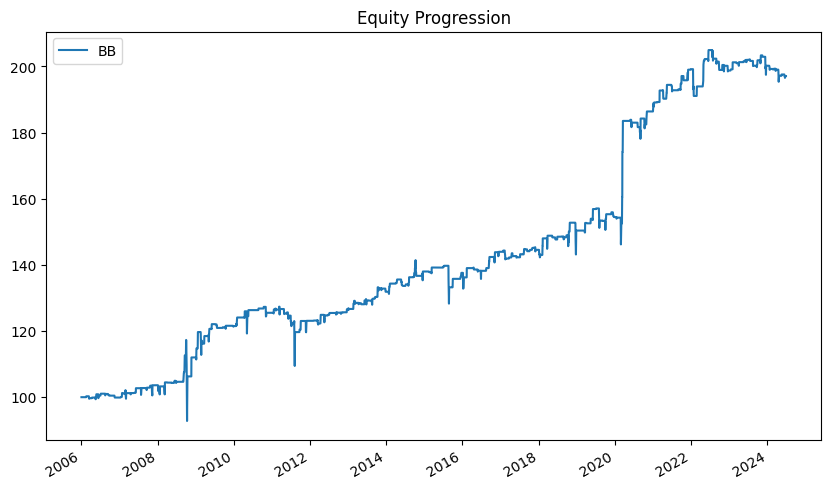

In [25]:
strategy = bt.Strategy('BB',
                       [bt.algos.WeighTarget(signal),
                        bt.algos.Rebalance()])
backtest = bt.Backtest(strategy, data)
result = bt.run(backtest)

result.plot(figsize=(10, 6))
plt.show()

In [26]:
result.stats.loc[['total_return', 'cagr', 'daily_vol', 'max_drawdown', 'calmar', 'daily_sharpe']]

,BB
total_return,0.970628
cagr,0.037377
daily_vol,0.079933
max_drawdown,-0.208758
calmar,0.179045
daily_sharpe,0.498829


## bt 패키지의 함수 

마지막으로 bt 패키지의 함수들을 정리해보도록 하겠다.

- 유니버스 선택
    - `bt.algos.SelectAll()`: 모든 종목 선택
    - `bt.algos.SelectHasData()`: 일정 갯수 이상의 데이터가 있는 종목 선택
    - `bt.algos.SelectMomentum()`: 모멘텀 상위 종목 선택, `bt.algos.SelectAll()`을 먼저 불러와야 함
    - `bt.algos.SelectWhere()`: 입력값이 True 일때만 투자

- 비중 선택
    - `bt.algos.WeighEqually()`: 동일 비중
    - `bt.algos.WeighSpecified()`: 비중 직접 입력. 리밸런싱 마다 동일한 값 적용.
    - `bt.algos.WeighTarget(signal)`: 비중 직접 입력. 리밸런싱 마다 입력한 값 적용.
    - `bt.algos.WeighERC()`: 위험균형 전략
    - `bt.algos.WeighInvVol()`: 역변동성 전략
    - `bt.algos.WeighMeanVar()`: 최대샤프지수 전략

- 리밸런싱 시점
    - `bt.algos.RunOnce()`: 처음 한번만 리밸런싱
    - `bt.algos.RunDaily()`: 매일 리밸런싱
    - `bt.algos.RunMonthly()`: 매월 리밸런싱
    - `bt.algos.RunQuarterly()`: 매분기 리밸런싱
    - `bt.algos.RunWeekly()`: 매주 리밸런싱
    - `bt.algos.RunYearly()`: 매년 리밸런싱

- 리밸런싱 방법
    - `bt.algos.Rebalance()`: 선택한 시점과 비중에 따라 리밸런싱
    - `bt.algos.RebalanceOverTime()`: n일에 걸쳐 리밸런싱

- 기타 함수들
    - `plot_weights()`: 투자 비중 출력
    - `get_security_weights()`: 투자 비중을 데이터프레임 형태로 반환
    - `prices()`: 누적수익률을 데이터프레임 형태로 구하기
    - `prices.rebase()`: 특정 시점부터 다시 100으로 환산
    - `prices.to_returns()`: 수익률 계산
    - `display()`: 성과 측정치
    - `display_monthly_returns()`: 월간 수익률 구하기
    - `turnover()`: 회전율 구하기

```{note}
위에서 백테스트한 추세추종과 평균회귀 전략의 경우 신호가 발생하면 해당일 종가에 포지션을 취한다고 가정했다. 그러나 현실에서는 종가 직전까지 발생한 신호를 바탕으로 종가에 매매를 하거나 종가로 계산된 신호를 바탕으로 다음날 시가에 매매를 해야하므로, 백테스트의 수익률과 실제 수익률은 상당히 차이가 있을 수 있다. 또한 매매수수료와 시장충격으로 인해 백테스트의 수익률과 실제 수익률간 차이가 발생할 수도 있다.
```